# Activity 7 (IC2)

**Professor: Ricardo Prudêncio**

Task:

(PT-BR)
1. Faça a leitura sobre Partial Dependence Plots - Molnar pgs. 113 a 124 e resolva o exercício.

(a). Faça a leitura de uma base de dados e separe seus dados de treinamento e teste;

(b). Treine um modelo caixa-preta (e.g., Random Forest, MLP, kNN, SVC).

(c). Aplique Feature Importance e construa PDPs para as três variáveis consideradas mais importante.

(EN)
1. Read about Partial Dependence Plots—Molnar, pages 113 to 124, and solve the exercise.

(a) Load a dataset and split your data into training and test sets;

(b) Train a black-box model (e.g., Random Forest, MLP, kNN, SVC);

(c) Apply Feature Importance and construct PDPs for the three variables considered most important.

## Base Notebook (Do Not Run)

In [ ]:
  from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

**READING THE DATA FRAME**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/datasets/statlog-heart-dataset.csv')
df.head()

,age,sex,chest,pressure,cholestoral,bloodsugar,electrocardiographic,heartRate,exInducedAngina,oldpeak,slope,numMajorVessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,yes
1,57,1,2,124,261,0,0,141,0,0.3,1,0,7,yes
2,56,1,3,130,256,1,2,142,1,0.6,2,1,6,yes
3,59,1,4,110,239,0,2,142,1,1.2,2,1,7,yes
4,60,1,4,140,293,0,2,170,0,1.2,2,2,7,yes


**TRAINING EXAMPLES**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['class'])
Y = df['class']
# Separando os dados em treinamento(75%) e teste(25%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

**--- LEARNING THE RF CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, Y_train)

**--- LEARNING THE Logistic Regression CLASSIFIER**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# lr = make_pipeline(StandardScaler(), LogisticRegression())
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
svc = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=2, probability = True))
svc.fit(X, Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=2, probability=True))])

**PARTIAL DEPENDENCE PLOTS**

**--- Creating the PDPs for the RF model**



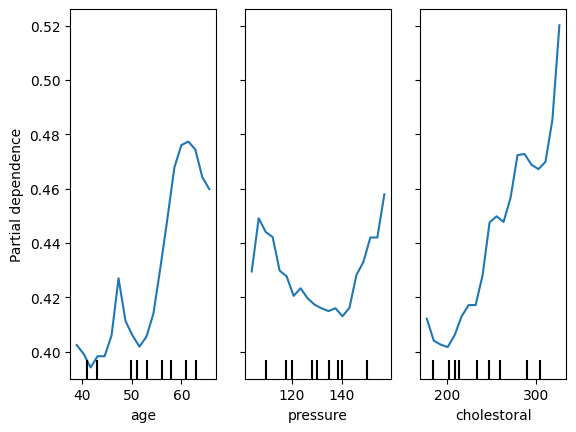

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
disp1 = PartialDependenceDisplay.from_estimator(rf, X_test, [0,3,4],grid_resolution=20)

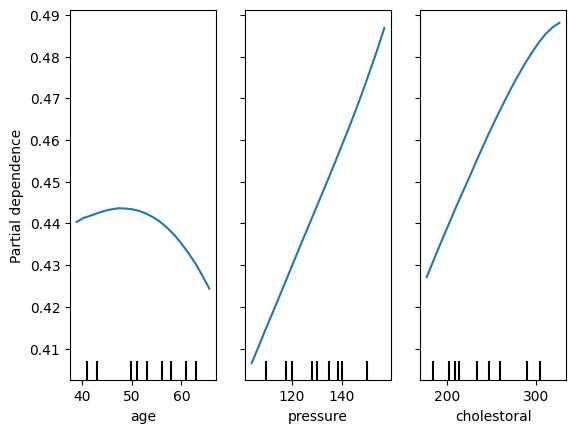

In [ ]:
disp1 = PartialDependenceDisplay.from_estimator(svc, X_test, [0,3,4],grid_resolution=20)

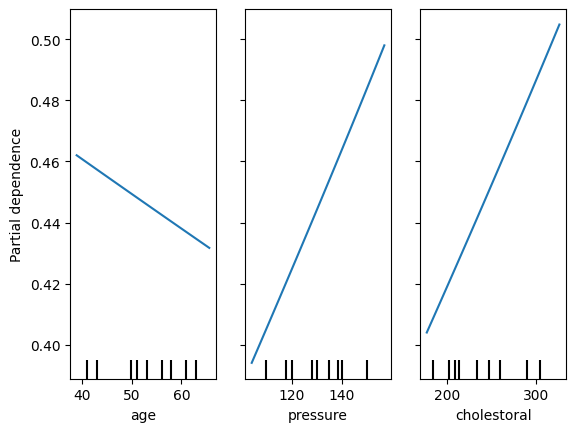

In [ ]:
disp1 = PartialDependenceDisplay.from_estimator(lr, X_test, [0,3,4],grid_resolution=20)

OBS.: 1. High values of both Thal and numVajorVessels indicate a prediction of heart disease. 2. Low values of both Thal and chest indicate the absence of heart disease. 4. Higher ages result on presence of disease. 4. The relation between age and cholesterol is not so clear, although there are higher disease probablities for old people with high cholesterol.

**--- Creating the PDPs for the KNN model**



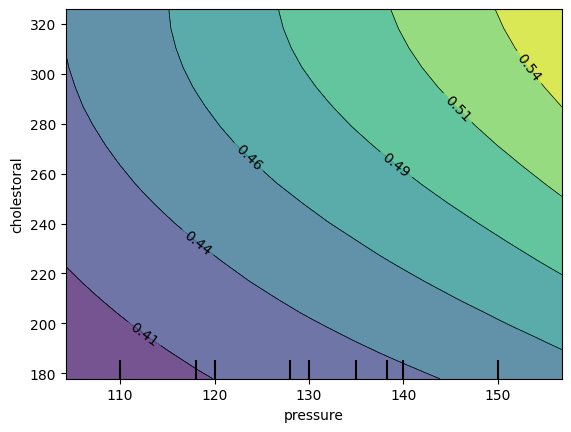

In [ ]:
disp1 = PartialDependenceDisplay.from_estimator(svc, X_test, [(3,4)],grid_resolution=20)

**ICE Plots**

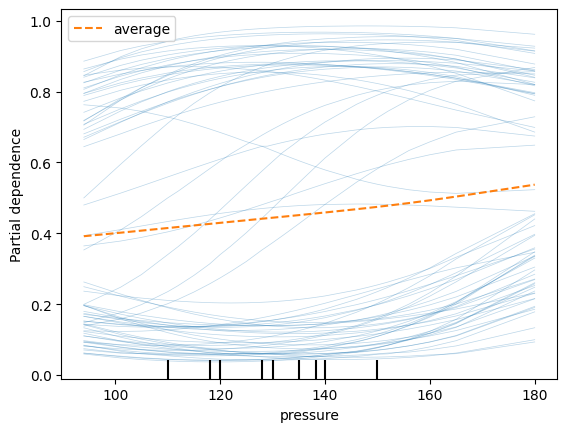

In [ ]:
disp1 = PartialDependenceDisplay.from_estimator(svc, X_test, [3], kind='both')

OBS.: Changes in cholesterol seem to impact individuals with low predicted probabilities of disease returned by the RF model.

OBS.: Risk of disease increases for 55 years-old people. Apparently the risk is reduced close to 70, but this effect may be cause by the low presence of old people in the training data (i.e., maybe it is not a reliable effect).

## Resolution

(a) Load a dataset and split your data into training and test sets

We'll use the California Housing dataset, which is a regression dataset included in scikit-learn. This dataset contains information collected from the 1990 California census, including features like median income, house age, and location, with the target variable being the median house value.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# Display the first few rows
print("First five rows of the dataset:")
X.head()

First five rows of the dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [2]:
X.shape

(20640, 8)

In [3]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

(b) Train a black-box model (e.g., Random Forest, MLP, kNN, SVC)

We'll train a Random Forest Regressor as our black-box model.

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {mse:.2f}")

Test Mean Squared Error: 0.26


(c) Apply Feature Importance and construct PDPs for the three variables considered most important

We'll extract feature importances from the trained Random Forest model to identify the top three features. Despite using èrmutation Feature Importances in the last activities, we are going to use Mean Decrease in Impurity (MDI) Feature Importance for this one. In tree-based models like Random Forests, the importance of a feature is computed as the total reduction of the criterion (e.g., Gini impurity or variance) brought by that feature across all trees in the forest. Each time a feature is used to split a node, the impurity criterion is decreased. The sum of all these decreases for a feature gives its importance.


Feature Importances:
      Feature  Importance
0      MedInc    0.524871
5    AveOccup    0.138443
6    Latitude    0.088936
7   Longitude    0.088629
1    HouseAge    0.054593
2    AveRooms    0.044272
4  Population    0.030650
3   AveBedrms    0.029606


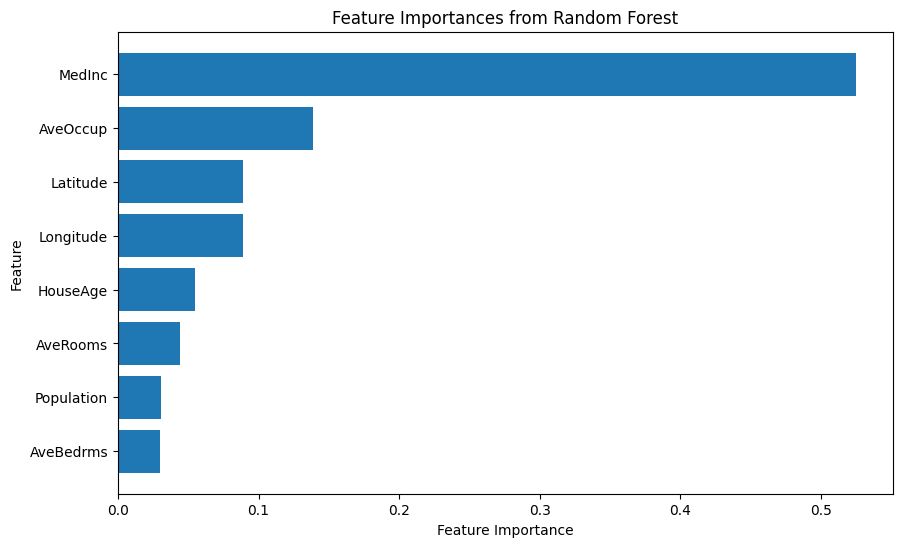

In [5]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print("\nFeature Importances:")
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

We'll use scikit-learn's PartialDependenceDisplay to plot the PDPs for the top three features.

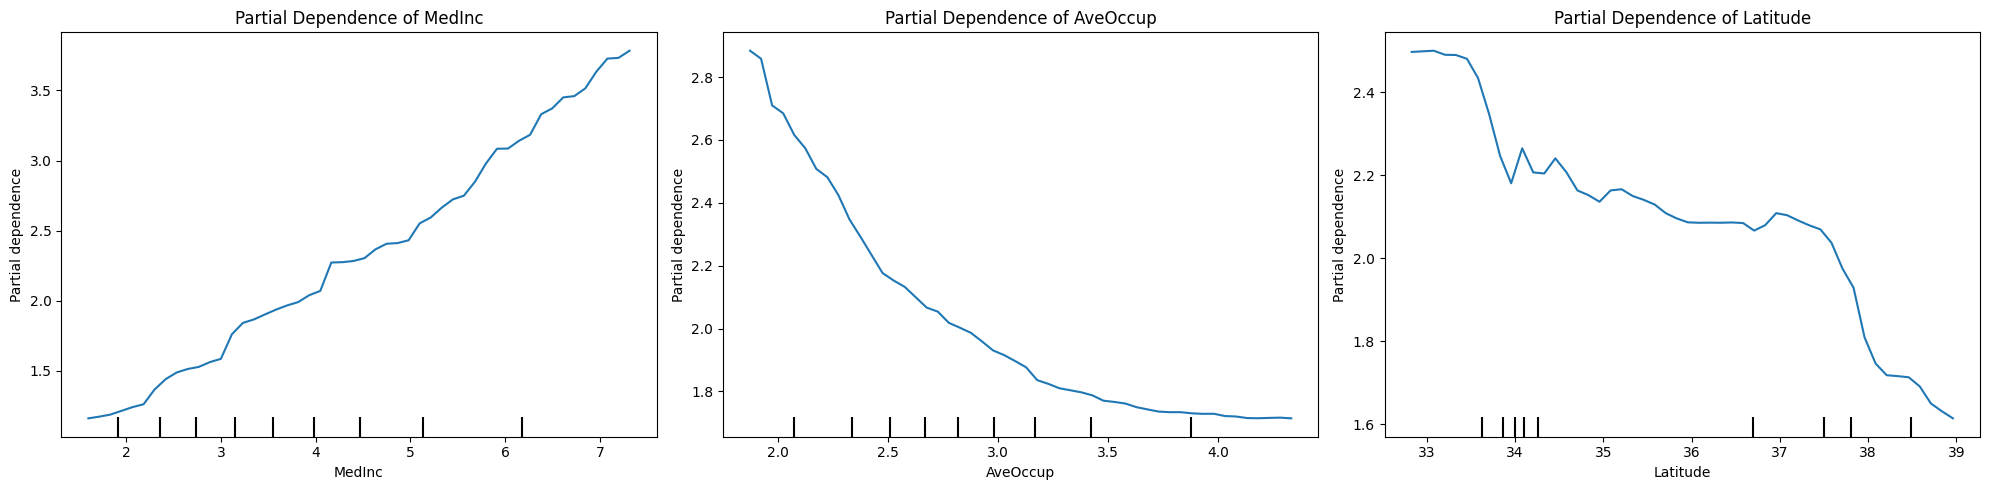

In [6]:
from sklearn.inspection import PartialDependenceDisplay

top_features = feature_importance_df['Feature'].iloc[:3].tolist()

# Plot PDPs for the top three features
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for i, feature in enumerate(top_features):
    PartialDependenceDisplay.from_estimator(
        model,
        X_train,
        [feature],
        ax=ax[i],
        grid_resolution=50,
    )
    ax[i].set_title(f'Partial Dependence of {feature}')

plt.tight_layout()
plt.show()


Here, we can see that the outcome varies almost linearly (positively) when It comes to the MedInc variable. The others seem to have a negative relation.

 One important point that the chapter hihglights is that, When features are correlated, permutation feature importance can be misleading because shuffling a feature breaks its association with other features, potentially affecting the model's predictions in unintended ways. It's important to check for feature correlations and understand their impact on permutation feature importance to ensure accurate interpretation of the results.

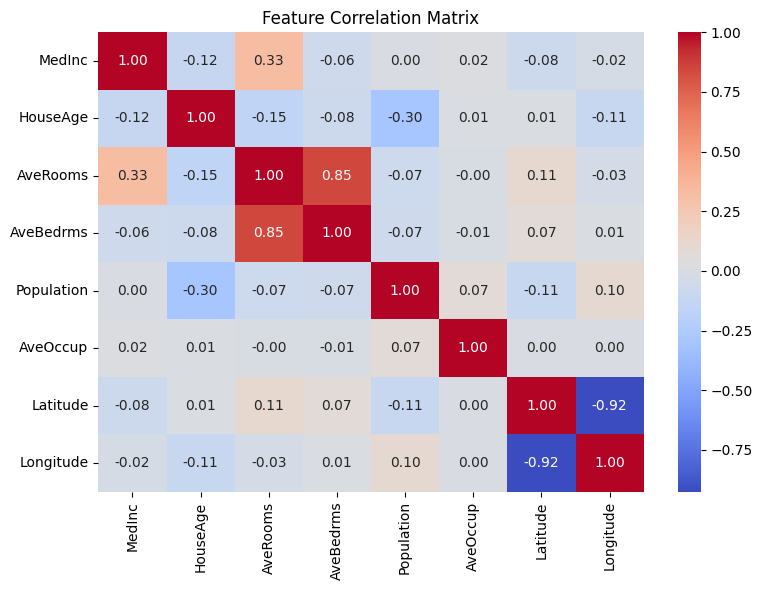

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = X.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

Latitude and Longitude seem to have high correlation, but none seem to be much important to the model (even when considering only one of them - since the feature importance could be assigned to both), so we do not need to account for this.

The distribution of feature values is another crucial factor to consider when using permutation feature importance. Not only can feature correlations affect the interpretation of importance scores, but the underlying distribution of each feature can also influence the results.

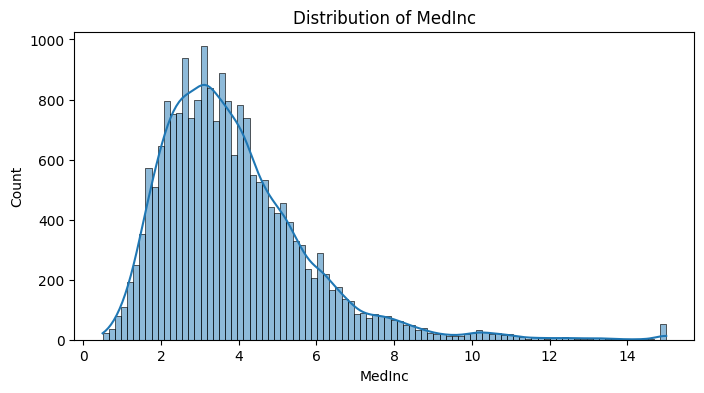

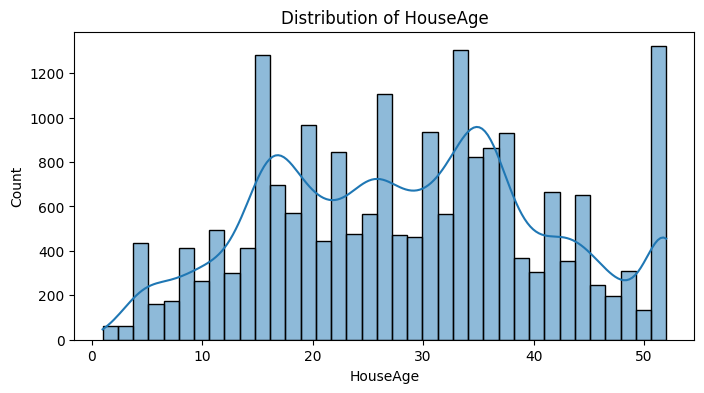

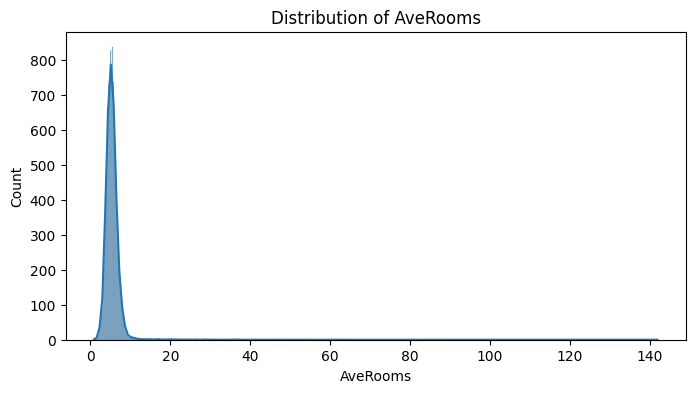

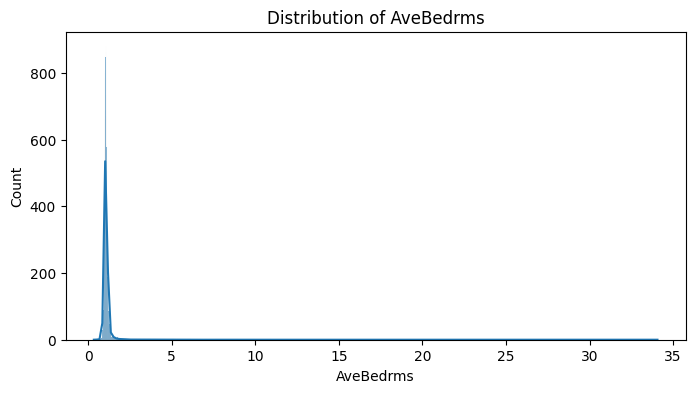

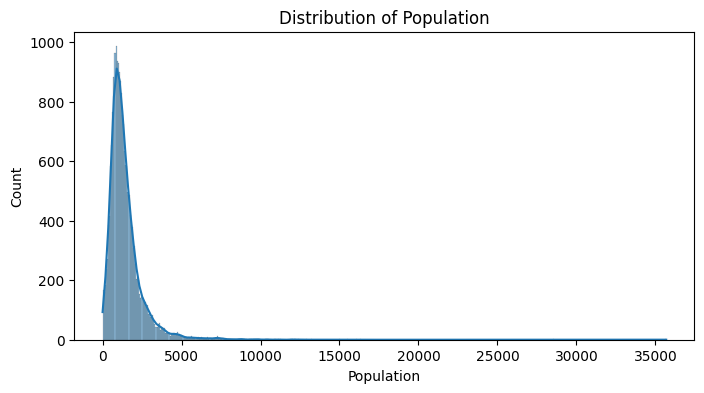

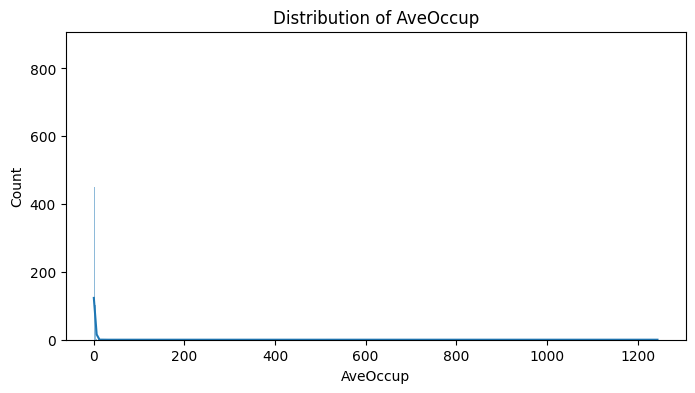

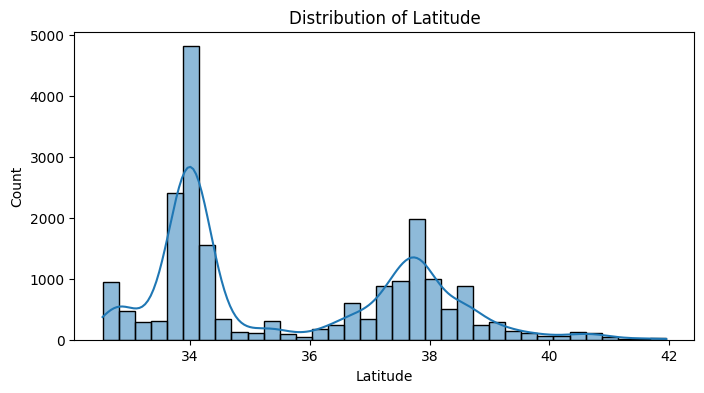

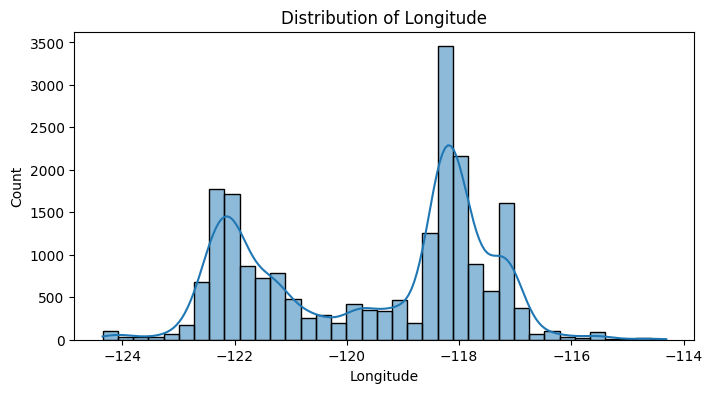

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in X.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

We see that the distributions are quite skewed. Let's implement stratified shuffling to account for them.

In [11]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

def stratified_permutation_importance(model, X, y, feature, n_repeats=5, bins=10):
    baseline_performance = mean_squared_error(y, model.predict(X))

    performance_drops = []
    for _ in range(n_repeats):
        X_permuted = X.copy()

        # Create bins based on quantiles
        X_permuted['bin'] = pd.qcut(X_permuted[feature], q=bins, duplicates='drop')

        # Shuffle within bins with observed=True
        X_permuted[feature] = X_permuted.groupby('bin', observed=True)[feature].transform(
            lambda x: np.random.permutation(x)
        )

        # Drop the bin column
        X_permuted = X_permuted.drop(columns='bin')

        # Predict and compute performance
        y_pred_permuted = model.predict(X_permuted)
        permuted_performance = mean_squared_error(y, y_pred_permuted)
        performance_drop = permuted_performance - baseline_performance
        performance_drops.append(performance_drop)

    importance_mean = np.mean(performance_drops)
    importance_std = np.std(performance_drops)

    return importance_mean, importance_std

feature_importances = {}
for feature in X.columns:
    importance_mean, importance_std = stratified_permutation_importance(
        model, X_test, y_test, feature
    )
    feature_importances[feature] = {'Importance_Mean': importance_mean, 'Importance_Std': importance_std}

# Convert to DataFrame
strat_perm_importance_df = pd.DataFrame(feature_importances).T.sort_values(by='Importance_Mean', ascending=False)
    
print("\nStratified Permutation Feature Importances:")
print(strat_perm_importance_df)


Stratified Permutation Feature Importances:
            Importance_Mean  Importance_Std
Latitude           0.073739        0.003287
MedInc             0.068680        0.005678
Longitude          0.054202        0.002428
AveOccup           0.009162        0.002604
Population         0.005359        0.001708
AveRooms           0.003487        0.001114
HouseAge           0.002193        0.000725
AveBedrms          0.001272        0.000279


The importance scores reflect the feature's impact while considering its distribution. From here, we could just get the Partial Dependences as expected.

In [1]:
class A:
    def __init__(self, value):
        self.value = value
    def __or__(self, other):
        print("A's __or__ method is called")
        return self.value | other.value

class B:
    def __init__(self, value):
        self.value = value
    def __or__(self, other):
        print("B's __or__ method is called")
        return self.value | other.value

objA = A(2)
objB = B(3)
result = objA | objB

A's __or__ method is called


In [2]:
def outer_function():
    print("This is the outer function.")
    
    def inner_function():
        print("This is the inner function.")
    
    # Call the inner function from within the outer function
    inner_function()

# Call the outer function
outer_function()

This is the outer function.


In [2]:
result

3